# PDI

- Por questão de memória, executado com 25 imagens de cada classe, com 5 classes
- Para comparar com Log-GaborFiltersBank.ipynb

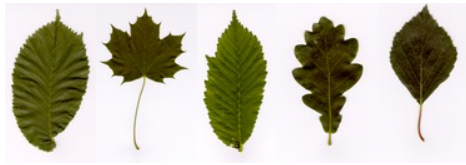

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import pandas as pd
from os import listdir


In [2]:
#Definindo o filtro de gabor (trocar para log-gabor quando nescessario)
def gabor(lamda, theta, psi, sigma, gamma, M, N):

  (x,y) = np.meshgrid(np.arange(0,N), np.arange(0,M))

  # Rotation 
  xl =  (x-N/2) * np.cos(theta) + (y-M/2) * np.sin(theta)
  yl = -(x-N/2) * np.sin(theta) + (y-M/2) * np.cos(theta)

  gab_filter = np.cos((2*np.pi/lamda)*xl + psi)  
  gab_filter = gab_filter * np.exp((-1/(2*sigma**2))*(xl**2 + gamma**2 * yl**2))

  return gab_filter 

In [3]:
def filter(imgFreq, gb, P, Q, M, N):
    #G = H*F
    Fimg_filtered = gb*imgFreq

    #fft inversa
    img_back = np.fft.ifft2(Fimg_filtered)

    # Multiplicao por (-1)^(x+y)
    mult_img_back = np.zeros([P, Q])
    for x in range(P):
        for y in range(Q):
            mult_factor = (-1)**(x+y)
            mult_img_back[x, y] = img_back[x, y].real * mult_factor

    final_img = mult_img_back[0:M, 0:N]

    return final_img

In [4]:
#img_path = 'C:/Users/mathe/OneDrive/Área de Trabalho/Stuff/UFSCAR/PDI/Trabalho/Dataset/Images'
img_path = './Dataset/Images'

df = pd.DataFrame()

#for img_filename in listdir(img_path):
#    print(f'{img_path}/{img_filename}')

In [5]:
i = 1
classes = []

#para cada imagem:
for img_filename in listdir(img_path):
    print(f'{i}: Processing imag: {img_path}/{img_filename}')
    # Lê imagem e automaticamente converte para 1 canal de cinza
    img = cv2.imread(img_path + '/' + img_filename, cv2.IMREAD_GRAYSCALE)

    img = cv2.resize(img, (256, 256), interpolation=cv2.INTER_AREA)

    img2 = img.reshape(-1)
    df_image = pd.DataFrame()
    df_image['Original Image'] = img2

    #Padding 
    M, N = img.shape
    img_padded = np.pad(img, ((0, M), (0, N)), 
                        mode='constant', constant_values=0)
    P, Q = img_padded.shape


    # Multiplicao por (-1)^(x+y)
    mult_img = np.zeros([P, Q])

    for x in range(P):
        for y in range(Q):
            mult_factor = (-1)**(x+y)
            mult_img[x, y] = img_padded[x, y] * mult_factor
    #mult_img = img_padded * np.fromfunction(lambda x, y: (-1)**(x+y), img_padded.shape)

    # Converter imagem do domínio do espaço para o domínio da frequência
    f = np.fft.fft2(mult_img)

    # =====================================
    count = 1
    #Cria filtros de gabor
    classes.append(img_filename.split('nr')[0])
    for theta in range(3):
        theta = theta * 60 * (np.pi/180)
        for sigma in (30, 50):
            for lamba  in (25, 50):
                for gamma in (0.5, 1):
                    label = 'Gabor-' + str(count)

                    psi = 0
                    gb = gabor(lamba, theta, psi, sigma, gamma, P, Q)

                    fimg = filter(f, gb, P, Q, M, N)
                    filtered_img = fimg.reshape(-1)
                    df_image[label] = filtered_img
                    count += 1

    count = 0
    flattened = df_image.values.reshape(1, -1)
    df = pd.concat([df, pd.DataFrame(flattened)], ignore_index=True)
    i += 1
df.insert(0, 'classe', classes)
df

1: Processing imag: ./Dataset/Images/l1nr001.tif
2: Processing imag: ./Dataset/Images/l1nr002.tif
3: Processing imag: ./Dataset/Images/l1nr003.tif
4: Processing imag: ./Dataset/Images/l1nr004.tif
5: Processing imag: ./Dataset/Images/l1nr005.tif
6: Processing imag: ./Dataset/Images/l1nr006.tif
7: Processing imag: ./Dataset/Images/l1nr007.tif
8: Processing imag: ./Dataset/Images/l1nr008.tif
9: Processing imag: ./Dataset/Images/l1nr009.tif
10: Processing imag: ./Dataset/Images/l1nr010.tif
11: Processing imag: ./Dataset/Images/l1nr011.tif
12: Processing imag: ./Dataset/Images/l1nr012.tif
13: Processing imag: ./Dataset/Images/l1nr013.tif
14: Processing imag: ./Dataset/Images/l1nr014.tif
15: Processing imag: ./Dataset/Images/l1nr015.tif
16: Processing imag: ./Dataset/Images/l1nr016.tif
17: Processing imag: ./Dataset/Images/l1nr017.tif
18: Processing imag: ./Dataset/Images/l1nr018.tif
19: Processing imag: ./Dataset/Images/l1nr019.tif
20: Processing imag: ./Dataset/Images/l1nr020.tif
21: Proce

,classe,0,1,2,3,4,5,6,7,8,...,1638390,1638391,1638392,1638393,1638394,1638395,1638396,1638397,1638398,1638399
0,l1,246.0,79.040819,70.121022,79.195931,70.244207,90.644719,76.038457,90.888368,76.219506,...,124.031710,124.020227,0.000002,0.019279,0.599712,5.521684,0.002103,-0.000002,0.004231,0.246953
1,l1,248.0,80.391468,71.293347,80.414677,71.323105,92.263061,77.399540,92.224738,77.389095,...,125.243038,125.190844,0.000003,0.019389,0.604408,5.565949,0.002471,-0.000002,0.004297,0.248924
2,l1,244.0,78.931436,70.000814,78.963658,70.049942,90.553076,75.941475,90.577828,75.991680,...,124.961988,124.894726,0.000003,0.019422,0.604471,5.561391,0.002529,-0.000002,0.004261,0.248869
3,l1,248.0,79.971222,70.932773,80.179098,71.084727,91.695074,76.933222,92.018739,77.162267,...,126.406384,126.342408,0.000002,0.019643,0.611552,5.631368,0.002203,-0.000002,0.004016,0.251902
4,l1,248.0,79.858971,70.833100,79.974304,70.930616,91.626334,76.806598,91.718058,76.933945,...,126.086114,126.101006,0.000003,0.019579,0.605445,5.600728,0.002419,-0.000002,0.004261,0.250531
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120,l5,250.0,80.821672,71.637330,80.776951,71.614141,92.741810,77.761246,92.665516,77.710270,...,125.760254,125.735245,0.000003,0.019521,0.607634,5.594830,0.002625,-0.000002,0.003936,0.249909
121,l5,248.0,80.256846,71.149915,80.241483,71.131587,92.068102,77.213153,92.081336,77.202799,...,125.712748,125.688882,0.000003,0.019512,0.608865,5.599106,0.002338,-0.000002,0.004199,0.250330
122,l5,248.0,80.513380,71.378794,80.372771,71.275293,92.350408,77.457937,92.358682,77.458616,...,125.769345,125.828082,0.000003,0.019598,0.610543,5.617916,0.002710,-0.000002,0.004125,0.251655
123,l5,249.0,80.540488,71.411772,80.550842,71.391580,92.420045,77.496221,92.397322,77.475018,...,125.932691,125.941915,0.000003,0.019578,0.609196,5.609957,0.002415,-0.000002,0.004050,0.250916


# AM

- Note que agora o vetor $df$ armazena as caracteristicas obtidas pelo banco de filtros em cima da imagem

In [6]:
import matplotlib.colors as mcolors
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.tree import plot_tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import RocCurveDisplay
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix

In [7]:
random_seed = 42
df = df.sample(frac=1, random_state=random_seed).reset_index(drop=True)
df



,classe,0,1,2,3,4,5,6,7,8,...,1638390,1638391,1638392,1638393,1638394,1638395,1638396,1638397,1638398,1638399
0,l1,246.0,79.527350,70.537755,79.582679,70.583665,91.206153,76.494464,91.293519,76.556550,...,125.465857,125.406875,0.000002,0.019434,0.605892,5.576470,0.002247,-0.000002,0.004056,0.249504
1,l2,245.0,79.239755,70.236782,79.463619,70.422787,90.934245,76.239549,91.172082,76.419960,...,123.231259,123.240060,0.000003,0.019239,0.596675,5.495885,0.002445,-0.000002,0.004132,0.245929
2,l2,247.0,79.563857,70.548898,79.688480,70.647313,91.293667,76.556526,91.414830,76.640961,...,121.502419,121.492833,0.000003,0.018952,0.587866,5.419490,0.002709,-0.000002,0.003966,0.242773
3,l4,246.0,79.585351,70.560318,79.577163,70.560107,91.318592,76.574084,91.297878,76.572429,...,126.056180,126.026100,0.000003,0.019587,0.609422,5.611223,0.002328,-0.000002,0.004105,0.250920
4,l3,246.0,79.867926,70.822213,79.793748,70.791973,91.660128,76.862767,91.475736,76.752954,...,125.739290,125.725332,0.000003,0.019578,0.608629,5.604765,0.002502,-0.000002,0.004008,0.250574
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120,l5,249.0,80.439246,71.295895,80.526429,71.384118,92.288904,77.361679,92.389170,77.477863,...,125.537321,125.522416,0.000003,0.019492,0.607488,5.580616,0.002366,-0.000002,0.003971,0.249823
121,l1,245.0,79.464192,70.488435,79.426191,70.469902,91.131926,76.466285,91.037986,76.393638,...,127.371608,127.288130,0.000003,0.019744,0.615042,5.659893,0.002461,-0.000002,0.004318,0.253221
122,l4,243.0,78.748070,69.830207,78.864950,69.932561,90.382972,75.796556,90.448986,75.844496,...,125.352791,125.299613,0.000003,0.019437,0.606991,5.584595,0.002298,-0.000002,0.003901,0.249881
123,l3,245.0,79.608318,70.616149,79.653064,70.648059,91.323666,76.599731,91.341810,76.626815,...,126.830545,126.739648,0.000003,0.019666,0.611791,5.632874,0.002338,-0.000002,0.004172,0.251911


## Decision Tree

In [8]:
Atributos = df.drop(columns=['classe'])  # Atributos
y = df['classe']  # Variavel objetivo

#Separa testes de treino
X_train, X_test, y_train, y_test = train_test_split(Atributos, y, test_size=0.3, random_state=42)

#Treina modelo
clf = DecisionTreeClassifier(max_depth=5)
clf.fit(X_train, y_train)

#Usa modelo nos dados de teste
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print(classification_report(y_test, y_pred))

Accuracy: 0.71
              precision    recall  f1-score   support

          l1       0.57      0.44      0.50         9
          l2       0.83      1.00      0.91        10
          l3       0.60      0.43      0.50         7
          l4       0.56      1.00      0.71         5
          l5       1.00      0.71      0.83         7

    accuracy                           0.71        38
   macro avg       0.71      0.72      0.69        38
weighted avg       0.72      0.71      0.70        38



## Random Forest

In [9]:
# Instanciar a Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=32, random_state=42)

# Ajustar o modelo para os dados de treinamento
rf_classifier.fit(X_train, y_train)

# Fazer predições nos dados de teste
y_pred = rf_classifier.predict(X_test)

# Evaluate the model (you can use accuracy, precision, recall, etc.)
accuracy = rf_classifier.score(X_test, y_test)
print(f"Accuracy: {accuracy:.2f}")
print(classification_report(y_test, y_pred))

Accuracy: 0.87
              precision    recall  f1-score   support

          l1       1.00      0.78      0.88         9
          l2       1.00      0.90      0.95        10
          l3       0.75      0.86      0.80         7
          l4       0.80      0.80      0.80         5
          l5       0.78      1.00      0.88         7

    accuracy                           0.87        38
   macro avg       0.87      0.87      0.86        38
weighted avg       0.89      0.87      0.87        38



## Naive Bayes

In [10]:
#Aqui precisa normalizar
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)


nb_classifier = GaussianNB()
nb_classifier.fit(X_train, y_train)

y_pred = nb_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print(classification_report(y_test, y_pred))

Accuracy: 0.66
              precision    recall  f1-score   support

          l1       0.67      0.89      0.76         9
          l2       0.90      0.90      0.90        10
          l3       0.75      0.43      0.55         7
          l4       0.42      1.00      0.59         5
          l5       0.00      0.00      0.00         7

    accuracy                           0.66        38
   macro avg       0.55      0.64      0.56        38
weighted avg       0.59      0.66      0.60        38



C:\Users\mathe\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\mathe\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\mathe\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classificati

## SVM

TODO